# Analysis Notebook

In [96]:
from json import load
import numpy as np
from utils.data_loader import load_data, convert_signal
from utils.normalisation import min_max
import matplotlib.pyplot as plt
import pandas as pd
import os 

### Helper functions

In [109]:
def simple_plot(data, title):
    plt.figure(figsize=[7,5])
    plt.style.use('seaborn-muted')
    plt.title(title)
    plt.plot(data)
    plt.xlabel('Time')
    plt.ylabel(title)
    plt.show()

def plot_insoles(data, title, save=False):
    acc_left, gyro_left = data[0]
    acc_righ, gyro_right = data[1]

    plt.figure(figsize=[10,7])
    plt.style.use('seaborn-muted')
    # --------------------------------------------------
    plt.subplot(2, 2, 1).set_title(title + ' Left Acc')
    plt.plot(acc_left)#min_max(acc_left))
    plt.ylabel('Amplitude')

    # --------------------------------------------------
    plt.subplot(2, 2, 3).set_title(title + ' Left Gyro')
    plt.plot(gyro_left)#min_max(gyro_left))
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

    # --------------------------------------------------
    plt.subplot(2, 2, 2).set_title(title + ' Right Acc')
    plt.plot(acc_righ)#min_max(acc_righ))
    plt.ylabel('Amplitude')

    # --------------------------------------------------
    plt.subplot(2, 2, 4).set_title(title + ' Right Gyro')
    plt.plot(gyro_right)#min_max(gyro_right))
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

    if save:
        path = os.path.join(os.getcwd(), 'graphs', subdir)  
        if not os.path.exists(path):
            os.makedirs(path)
        # make sure that the save directory exists
        plt.savefig(path + '\\' +  title + '.png')
    else: 
        plt.show()


def integrate(x):
    initial_value = 0
    result = []
    result.append(initial_value)
    for i in range(len(x) - 1):
        result.append(result[i] * 0.05 + (0.05)*(x[i + 1] + x[i]))

    return result



### Data loader

In [7]:
path = f"./data"
root = './data'
file_list = []
for file in os.listdir(root):
    file_list.append(os.path.join(root, file))

print('Files found: ', file_list)

Files found:  ['./data\\20220830_S53_rawDataLeft_vuQAzlAArG.txt', './data\\20220830_S53_rawDataRight_vuQAzlAArG.txt', './data\\20220830_S55_rawDataLeft_vuQAzlAArG.txt', './data\\20220830_S55_rawDataRight_vuQAzlAArG.txt', './data\\20220830_S57_rawDataLeft_vuQAzlAArG.txt', './data\\20220830_S57_rawDataRight_vuQAzlAArG.txt', './data\\20220830_S59_rawDataLeft_vuQAzlAArG.txt', './data\\20220830_S59_rawDataRight_vuQAzlAArG.txt', './data\\20220830_S60_rawDataLeft_vuQAzlAArG.txt', './data\\20220830_S60_rawDataRight_vuQAzlAArG.txt', './data\\Raw Data Info.txt']


./data\20220830_S53_rawDataLeft_vuQAzlAArG.txt
./data\20220830_S53_rawDataRight_vuQAzlAArG.txt
./data\20220830_S55_rawDataLeft_vuQAzlAArG.txt
./data\20220830_S55_rawDataRight_vuQAzlAArG.txt
./data\20220830_S57_rawDataLeft_vuQAzlAArG.txt
./data\20220830_S57_rawDataRight_vuQAzlAArG.txt
./data\20220830_S59_rawDataLeft_vuQAzlAArG.txt
./data\20220830_S59_rawDataRight_vuQAzlAArG.txt


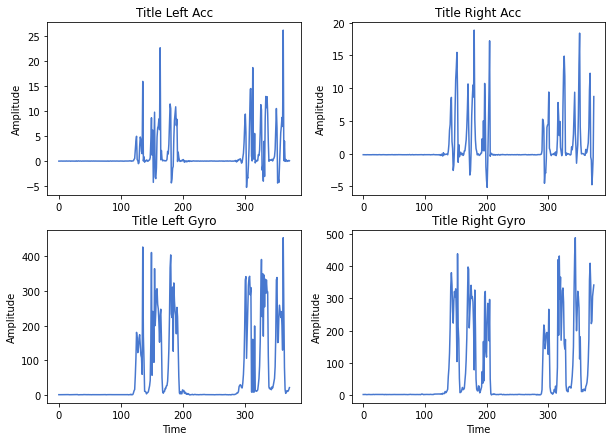

In [126]:
data = load_data(file_list[0:8]) # Select only the data instances

# Convert the signals 
acc_results = []
for sample in data: 
    signal = convert_signal(sample, type='acc_total')
    signal = signal.to_numpy()
    acc_results.append(signal.tolist())

gyro_results = []
for sample in data: 
    signal = convert_signal(sample, type='gyro_total')
    signal = signal.to_numpy()
    gyro_results.append(signal.tolist())

combined_data = [[acc_results[0], gyro_results[0]], [acc_results[1], gyro_results[1]]]

plot_insoles(combined_data, 'Title')


### Simple Calculation

Try keeping a running total of acceleration × time.

In other words, each pair of (acceleration, time) values tells you the amount of acceleration that occurred for that duration, which in turn tells you the change in velocity during that time. Add all the changes to arrive at the overall velocity.

So you can write

 `v[i+1] = v[i] + (a[i] * t[i])`

where:

    i = the i'th interval
    a[i] = the acceleration during that interval
    t[i] = the duration of the interval (perhaps always 0.004 sec?)
    v[i] = the velocity at the end of the interval

In [127]:
sample = 4
a = acc_results[sample]
v = integrate(a)
s = integrate(v)
print('Total Distance Left Foot: ', sum(s))


a = acc_results[sample + 1]
v = integrate(a)
s = integrate(v)
print('Total Distance Right Foot: ', sum(s))


Total Distance Left Foot:  2.8245469908289413
Total Distance Right Foot:  1.839100014226484


In [124]:
print(len(a))
print(len(v))
print(len(s))


255
255
255


Loop to go through all of the files and save each pair.

In [133]:
for i in range(0, len(data), 2):
    f = file_list[i].split('\\')[1]
    filename = f.split('.')[0]

    # Left foot ---------------------------
    a_l = acc_results[i]
    v_l = integrate(a_l)
    s_l = integrate(v_l)
    print(len(a_l), len(v_l), len(s_l))

    # Right foot --------------------------
    a_r = acc_results[i + 1]
    v_r = integrate(a_r)
    s_r = integrate(v_r)
    print(len(a_r), len(v_r), len(s_r))
    
    # Dictionary that will be translated into a DataFrame
    d = {
            'acc_left': pd.Series(a_l), 
            'vel_left': pd.Series(v_l), 
            'dist_left': pd.Series(s_l),
            'acc_right': pd.Series(a_r), 
            'vel_right': pd.Series(v_r), 
            'dist_right': pd.Series(s_r)
        }
    df = pd.DataFrame(d)
    df.to_csv(f'{filename}_results.csv')


372 372 372
375 375 375
420 420 420
420 420 420
249 249 249
255 255 255
312 312 312
315 315 315


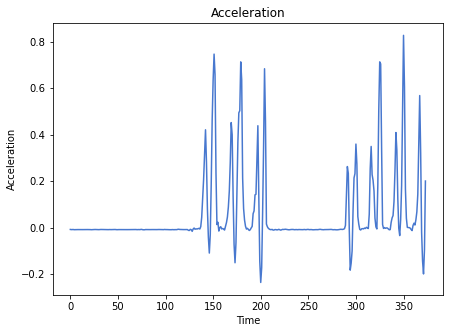

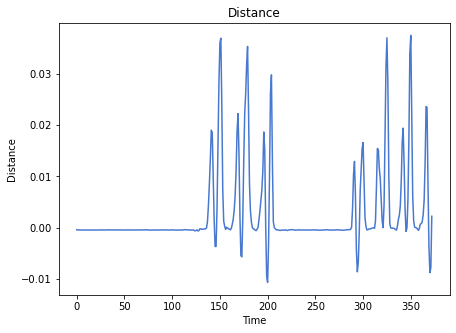

In [95]:
simple_plot(v, 'Acceleration')
simple_plot(s, 'Distance')


for 

### Appendix 

--- 
**Trapezoid formula**

v[i+1] = v[i] + (t[i+1] - t[i])*(a[i+1] + a[i])/2


In [86]:
v0 = 0
v = []
for i in range(len(a) - 1):
    v.append(v0 * 0.05 + (0.05)*(a[i + 1] + a[i])/2)
    v0 = v[i]

In [87]:
s0 = 0
s = []
for i in range(len(v) - 1):
    s.append(s0 * 0.05 + (0.05)*(v[i + 1] + v[i])/2)
    s0 = s[i]

In [88]:
sum(s)

0.997334402875676